In [1]:
import pandas as pd
import os
import pathlib
import matplotlib.pyplot as plt

import re

In [ ]:
# relative path to data_raw
notebook_dir = pathlib.Path().resolve()
raw_features_path = os.path.join(notebook_dir,'../raw_data/accepted_features.csv')
features = pd.read_csv(raw_features_path)

In [ ]:
features

In [ ]:
print(features['Variable name'].duplicated().sum())

In [ ]:
# Extracting variable name into a list t and variable label into a list z

t = features['Variable name']
z = features['Variable label']

In [ ]:
t.drop_duplicates()

In [ ]:
t.size

In [ ]:
z.shape

In [ ]:
# Removing whitespaces in the list

z = [gap.strip() for gap in z]

In [ ]:
print(features['Variable name'].duplicated().sum())

In [ ]:
# Including the data index in the parameter list 
t.loc[383] = 'MCSID'

In [ ]:
t.size

In [ ]:
t_duplicate = t.drop_duplicates()
t_duplicate

In [ ]:
raw_data_path = os.path.join(notebook_dir,'../raw_data/sweep_6/UKDA-8156-tab/tab/mcs6_cm_interview.tab')
data = pd.read_csv(raw_data_path , sep='\t', index_col = 'MCSID',usecols=t)

In [ ]:
data

In [ ]:
# Changing parameters/columns names into the ones of list z
new_names = dict(zip(t,z))
data = data.rename(columns=new_names)

In [ ]:
data.shape

In [ ]:
data

In [ ]:
data.iloc[0:10,194:202]

In [ ]:
pattern = re.compile(rf"RosenbergGrid", flags=re.IGNORECASE)
matching_columns = [col for col in data.columns if pattern.search(col)]

In [ ]:
matching_columns

##### pacemaker needs to be removed

In [ ]:
data['Check CM has pacemaker'].value_counts()

##### IWR: Check Body Fat measurement needs to be removed

In [ ]:
data['IWR: Check Body Fat measurement'].value_counts()

##### AcademicSelfConceptGrid: I am good at Welsh needs to be removed

In [ ]:
data['AcademicSelfConceptGrid: I am good at Welsh'].value_counts()

##### (last 12 months) has another YP put his/her hands under CM's clothing? consider removing

In [ ]:
data["(last 12 months) has another YP put his/her hands under CM's clothing?"].value_counts()

##### (last 12 months) has CM touched another YP's private parts? needs to be removed

In [ ]:
data["(last 12 months) has CM touched another YP's private parts?"].value_counts()

##### (last 12 months) has CM performed oral sex on another young person? needs to be removed

In [ ]:
data["(last 12 months) has CM performed oral sex on another young person?"].value_counts()

##### Age CM first started drinking alcohol consider removing


In [ ]:
data["Age CM first started drinking alcohol"].value_counts()

##### Age CM first had 5 or more alcoholic drinks at a time needs to be removed

In [ ]:
data["Age CM first had 5 or more alcoholic drinks at a time"].value_counts()

##### Past 12 months: freq of CM wrote/spray painted somewhere they shouldn't needs to be removed

In [ ]:
data["Past 12 months: freq of CM wrote/spray painted somewhere they shouldn't"].value_counts()

##### Past 12 months: freq of CM damaged something that didn't belong to them needs to be removed

In [ ]:
data["Past 12 months: freq of CM damaged something that didn't belong to them"].value_counts()

##### How severe is CM's hearing problem needs to be removed

In [ ]:
data["How severe is CM's hearing problem"].value_counts()

##### CM voice change maybe considering removing

In [ ]:
data["CM voice change"].value_counts()

##### Age started to menstruate maybe consider removing

In [ ]:
data["Age started to menstruate"].value_counts()

##### Aspirations: what CM would like to be when grow up [SOC code] R5 [truncated at 3 chars] needs to be removed

In [ ]:
data["Aspirations: what CM would like to be when grow up [SOC code] R5 [truncated at 3 chars]"].value_counts()

##### Aspirations: what CM would like to be when grow up [SOC code] R7 [truncated at 3 chars] needs to be removed

In [ ]:
data["Aspirations: what CM would like to be when grow up [SOC code] R7 [truncated at 3 chars]"].value_counts()

In [ ]:
remove_columns = ["Aspirations: what CM would like to be when grow up [SOC code] R7 [truncated at 3 chars]",
                  "Aspirations: what CM would like to be when grow up [SOC code] R5 [truncated at 3 chars]",
                  "Age started to menstruate",
                  "CM voice change",
                  "How severe is CM's hearing problem",
                  "Past 12 months: freq of CM damaged something that didn't belong to them",
                  "Past 12 months: freq of CM wrote/spray painted somewhere they shouldn't",
                  "Age CM first had 5 or more alcoholic drinks at a time",
                  "Age CM first started drinking alcohol",
                  "(last 12 months) has CM performed oral sex on another young person?",
                  "(last 12 months) has CM touched another YP's private parts?",
                  "(last 12 months) has another YP put his/her hands under CM's clothing?",
                  'AcademicSelfConceptGrid: I am good at Welsh',
                  'IWR: Check Body Fat measurement',
                  'Check CM has pacemaker'
                 ]

In [ ]:
data_small = data.drop(remove_columns, axis=1, inplace=True)

In [ ]:
data_small.to_csv('data_small.csv', index=False)

## Loading data_small from raw_data folder

In [5]:
# relative path to data_raw
notebook_dir = pathlib.Path().resolve()
raw_features_path_small = os.path.join(notebook_dir,'../raw_data/data_small.csv')
data_small = pd.read_csv(raw_features_path_small)

In [7]:
data_small.shape

(11859, 187)

#### Working on feature 100 

In [ ]:
# Highest number means no one, lowest number means everyone
numerical_list_highest_num_is_lowest_value = [
    'How many of your close friends work hard at school?',
    'How many of your close friends get into a lot of trouble at school?',
]

In [84]:
numerical_list_highest_num_is_highest_value = [
    'How often CM smokes e-cigarettes',
    "How many of CM's friends drink alcohol",
    

    
]

SyntaxError: '[' was never closed (1583730137.py, line 1)

In [ ]:
# 0 no, 1 yes
categorical_list_binary_0 = [
    'What do you do if you are worried about something?',
    'What do you do if you are worried about smthng? (Tell a (boy/girl) friend)',
    'What do you do if you are worried about something? (Tell another relative)',
    'What do you do if you are worried about something? (Tell a teacher)',
    'What do you do if you are worried about something? (Tell another adult)',
    
]

In [ ]:
# 2 no, 1 yes
categorical_list_binary_1 = [
    'Has CM ever been attracted to a male,',
    '(last 12 months) has CM held hands with another young person?',
    '(last 12 months) has CM kissed another young person?',
    '(last 12 months) has CM cuddled with another young person?',
    '(last 12 months) has CM had sexual intercourse with another YP?',
    'Has CM ever had an alcoholic drink',
    
    
    
    
]

In [ ]:
# lowest number is true, highest number is not true. 

categorical_list_highest_num_not_true = [
    'SocSupGrid: I have family and friends who help me feel safe, secure and happy.',
    'SocSupGrid: There is someone I trust whom I would turn to if I had problems'
    



    
]

In [ ]:
removing_negative_9_8_1 = [
    'How many of your close friends work hard at school?',
    'How many of your close friends get into a lot of trouble at school?',
    'What do you do if you are worried about something?',
    'What do you do if you are worried about smthng? (Tell a (boy/girl) friend)',
    'What do you do if you are worried about something? (Tell another relative)',
    'What do you do if you are worried about something? (Tell a teacher)',
    'What do you do if you are worried about something? (Tell another adult)',
    'SocSupGrid: I have family and friends who help me feel safe, secure and happy.',
    'SocSupGrid: There is someone I trust whom I would turn to if I had problems',
    'Has CM ever been attracted to a male',
    '(last 12 months) has CM held hands with another young person?',
    '(last 12 months) has CM kissed another young person?',
    '(last 12 months) has CM cuddled with another young person?',
    '(last 12 months) has CM had sexual intercourse with another YP?',
     'How often CM smokes e-cigarettes',
     "How often CM's friends smoke cigarettes",
     'Has CM ever had an alcoholic drink',
    "How many of CM's friends drink alcohol",
    
     



    
]

In [ ]:
consider_removing = [
    'Has CM ever been attracted to a male',
    
]

In [80]:
x = 117

In [81]:
data_small.iloc[:, x]

0        1
1        2
2        2
3       -8
4        4
        ..
11854    2
11855    2
11856   -8
11857    2
11858    2
Name: How many of CM's friends drink alcohol, Length: 11859, dtype: int64

In [82]:
data_small.iloc[:, x].unique()

array([ 1,  2, -8,  4, -1,  3, -9])

<Axes: >

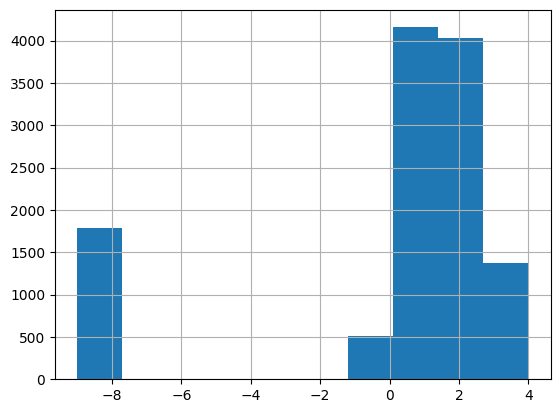

In [83]:
data_small.iloc[:, x].hist()